## Generación de un Proceso de Poisson

* Conteo de sucesos a lo largo del tiempo.

### Procesos de Poisson homogéneos

* Generación de variables aleatorias exponenciales independientes, donde se generen los tiempos de llegada. Donde se generan n numeros de distribución U (0,1), y Xi=-1/lambda(log(U)), donde Xi, es el tiempo entre (i-1) e i

Donde:
* T es el instante
* I tiempos de evento en orden creciente

In [1]:
Poisshom<-function(T, lambda){
 #Paso 1
 S<-vector()
 t=0
 I=0
 repeat{
     #Paso 2
     u<-runif(1)
     #Paso 3
     t<-t-(1/lambda)*log(u)
     if(t>T) break
     #Paso 4
     else{
         I<-I+1
         S[I]<-t
     }
     #Paso 5
 }
    return(S)
}

In [2]:
P<-Poisshom(15,2)
P
length(P)

[1]  0.7387763  0.7584516  2.6216458  3.0910685  3.2189625  3.8939139
 [7]  4.0843021  5.3343974  5.3352217  5.6177350  6.1596089  7.1609740
[13]  7.4459771  7.9328389  8.1628241  8.8590331  9.8398670 10.3491023
[19] 11.1368841 11.1916651 11.7518931 11.8999031 12.1179697 12.2405837
[25] 12.4676130 13.4634101 13.5453438 14.8135457

[1] 28

In [ ]:
# Aqui existe la misma probabilidad

### Procesos de Poisson no homogéneos

In [4]:
# Aqui no tienen la misma probabilidad, son de incrementos independientes

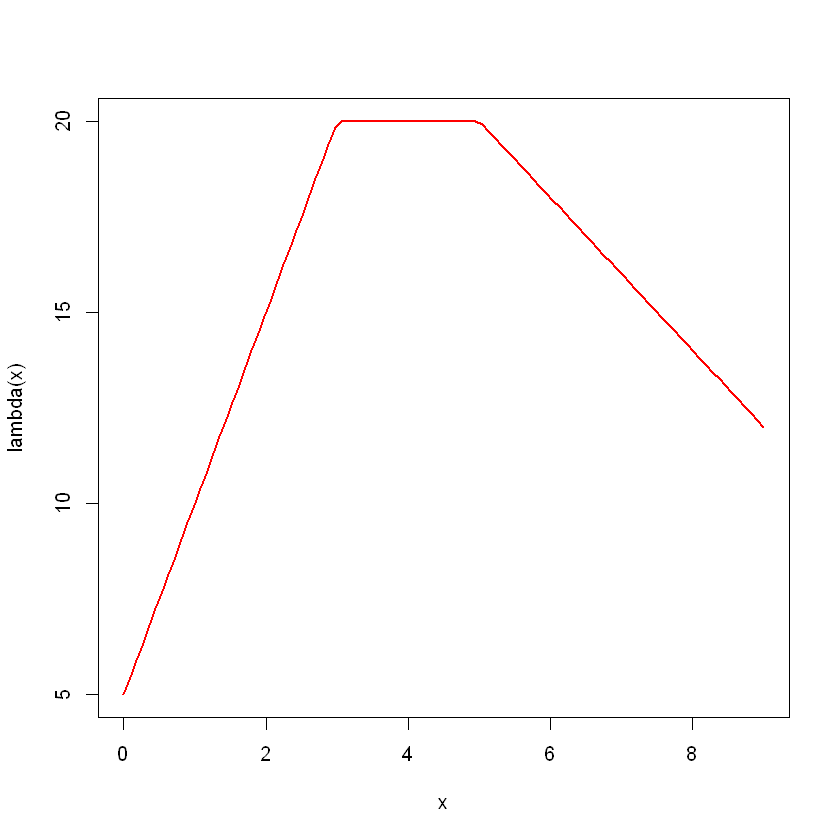

In [1]:
# Ejemplo NHPP
lambda<-function(x)(5+5*x)*I(x<3)+20*I(x>=3&x<5)+(20-2*(x-5))*I(x>=5&x<=9)
curve(lambda(x),xlim=c(0,9),ylab="lambda(x)", col="red", lwd=2)
# Se supone que grafica la función

In [2]:
# Algoritmo
S<-vector()
u1<-vector()
u2<-vector()

proc.nhpp<-function(T1){
    t<-0; I<-0; n<-1000; lam<-20
    for(i in 1:n){
        u1[i]<-runif(1)
        t<-t-log(u1[i])/lam
        if(t>T1){
         print(i)
         break
        }
        if(t<=T1){
            u2[i]<-runif(1)
        }
        if(u2[i]<=lambda(t)/lam){
            I<-I+1
            S[I]<-t
        }
    }
    print("S")
    print(S)
    print("Tasa de aceptación")
    print(length(S)/i)
    print("Número medio de realizaciones")
    print(i/length(S))
    
    hist(S)
    curve(lambda(x), xlim=c(0,9), col="red", lwd=2, add=TRUE)
}

[1] 176
[1] "S"
  [1] 0.1283489 0.3491277 0.6068326 0.6543956 0.7817613 0.8290425 0.9371762
  [8] 0.9632271 1.0699997 1.3418412 1.3507189 1.3559762 1.5180302 1.5753556
 [15] 1.6027891 1.6766118 1.6924616 1.9288121 1.9972295 2.0908905 2.1160878
 [22] 2.1187028 2.1328518 2.3308363 2.3327760 2.4180740 2.5580146 2.5893685
 [29] 2.6276953 2.6962575 2.7448005 2.7487231 2.7730176 2.8084999 2.8543626
 [36] 2.8615561 2.8700817 2.8988836 2.8998982 2.9167656 3.0098768 3.0715122
 [43] 3.2062228 3.3134415 3.3858180 3.4122532 3.4542276 3.4753228 3.5341116
 [50] 3.5367308 3.6096430 3.6127769 3.6197215 3.6677060 3.7257898 3.7516614
 [57] 3.8673944 3.9554090 3.9764292 3.9783894 3.9814000 4.0559734 4.0821743
 [64] 4.2330572 4.2567020 4.3367532 4.3530495 4.3550781 4.4122359 4.4365268
 [71] 4.4863554 4.5494142 4.6184808 4.7658447 4.7904065 4.8032060 4.8418703
 [78] 4.8688861 4.9118315 5.0558779 5.0936050 5.0987149 5.1210635 5.1391774
 [85] 5.1596999 5.1951922 5.3014617 5.3392242 5.3597909 5.3915503 5.4167

$x
  [1] 0.00 0.09 0.18 0.27 0.36 0.45 0.54 0.63 0.72 0.81 0.90 0.99 1.08 1.17 1.26
 [16] 1.35 1.44 1.53 1.62 1.71 1.80 1.89 1.98 2.07 2.16 2.25 2.34 2.43 2.52 2.61
 [31] 2.70 2.79 2.88 2.97 3.06 3.15 3.24 3.33 3.42 3.51 3.60 3.69 3.78 3.87 3.96
 [46] 4.05 4.14 4.23 4.32 4.41 4.50 4.59 4.68 4.77 4.86 4.95 5.04 5.13 5.22 5.31
 [61] 5.40 5.49 5.58 5.67 5.76 5.85 5.94 6.03 6.12 6.21 6.30 6.39 6.48 6.57 6.66
 [76] 6.75 6.84 6.93 7.02 7.11 7.20 7.29 7.38 7.47 7.56 7.65 7.74 7.83 7.92 8.01
 [91] 8.10 8.19 8.28 8.37 8.46 8.55 8.64 8.73 8.82 8.91 9.00

$y
  [1]  5.00  5.45  5.90  6.35  6.80  7.25  7.70  8.15  8.60  9.05  9.50  9.95
 [13] 10.40 10.85 11.30 11.75 12.20 12.65 13.10 13.55 14.00 14.45 14.90 15.35
 [25] 15.80 16.25 16.70 17.15 17.60 18.05 18.50 18.95 19.40 19.85 20.00 20.00
 [37] 20.00 20.00 20.00 20.00 20.00 20.00 20.00 20.00 20.00 20.00 20.00 20.00
 [49] 20.00 20.00 20.00 20.00 20.00 20.00 20.00 20.00 19.92 19.74 19.56 19.38
 [61] 19.20 19.02 18.84 18.66 18.48 18.30 18.12 17.94 17

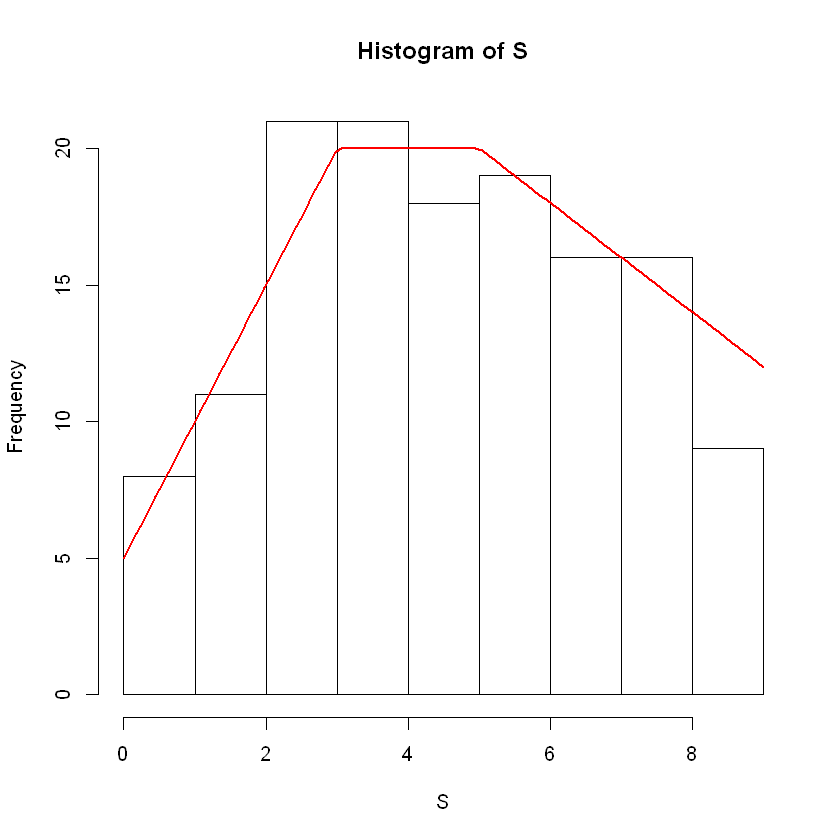

In [3]:
Prueba<-proc.nhpp(T1=9)
Prueba